# Advanced Machine Learning

## Monte Carlo Simulations 

A Monte Carlo method is a probabilistic algorithm that relies on random sampling rather than strict determinism to obtain its result. Monte Carlo methods are useful in many fields, particularly when the complexity of the problem in question renders deterministic solutions infeasible.

In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd
from numpy.random import normal

%matplotlib inline


## 1. Sampling Distributions

### Example of effect of size of the data on monte carlo sample

We have a function that defines the probability distribution of a random variable. We will use a Gaussian distribution with a mean of 50 and a standard deviation of 5 and draw random samples from this distribution. 

Assume that we don’t know the form of the probability distribution for this random variable and we want to sample the function to get an idea of the probability density. We can draw a sample of a given size and plot a histogram to estimate the density.

We would expect that as the size of the sample is increased, the probability density will better approximate the true density of the target function, given the law of large numbers.

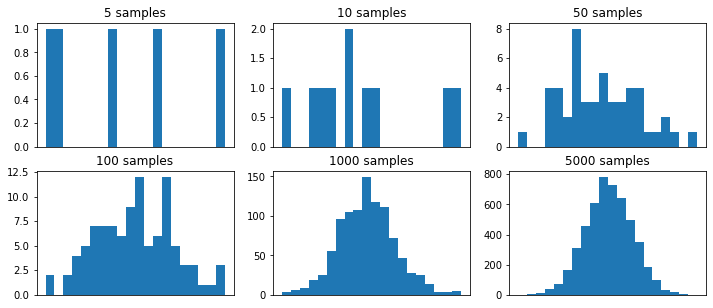

In [19]:
# define the distribution
mu = 50
sigma = 5

# generate monte carlo samples of differing sizes
sizes = [5, 10, 50, 100, 1000, 5000]
fig = plt.gcf()
fig.set_figwidth(12)
fig.set_figheight(5)

for i in range(len(sizes)):
    # generate sample
    sample = normal(mu, sigma, sizes[i])
    # plot histogram of sample
    plt.subplot(2, 3, i+1)
    plt.hist(sample, bins=20)
    plt.title('%d samples' % sizes[i])
    plt.xticks([])
# show the plot
plt.show()


### 2. Pi Estimation

Let r = 1.0 be both the radius of the circle and the length of one side of the square, then the area of the quarter-circle inside the square is $(1/4)πr^2$ and the area of the square is $r^2$, making the ratio of these two areas

$$((1/4)πr^2)/r^2=π/4$$

A Monte Carlo method for determining π using this knowledge works by:

1. Drawing a set of random points from inside the unit square
2. Counting the number of points that fall inside the quarter of the unit circle
3. Calculating the ratio of the number of points inside the quarter of the unit circle to the total number of points, which approaches π/4 as the number of random points increases.

This algorithm illustrates the main features of a Monte Carlo method: random (uniformly-distributed) simulation of trials applied over a system that converges as the number of trials increases.

In [3]:
n_points = 30000
df = pd.DataFrame(np.random.rand(n_points, 2), columns=['x', 'y'])
print (df[:10])

          x         y
0  0.436844  0.349264
1  0.415522  0.332631
2  0.369161  0.647477
3  0.216967  0.933681
4  0.312732  0.981292
5  0.164864  0.866430
6  0.082812  0.945774
7  0.168464  0.232012
8  0.019022  0.534628
9  0.432785  0.642337


In [4]:
def within_unit_circle(row):
    x, y = row['x'], row['y']
    return math.sqrt(x**2.0 + y**2.0) <= 1.0

In [5]:
df['within_unit_circle'] = df.apply(within_unit_circle, axis=1)
print (df[:10])

          x         y  within_unit_circle
0  0.436844  0.349264                True
1  0.415522  0.332631                True
2  0.369161  0.647477                True
3  0.216967  0.933681                True
4  0.312732  0.981292               False
5  0.164864  0.866430                True
6  0.082812  0.945774                True
7  0.168464  0.232012                True
8  0.019022  0.534628                True
9  0.432785  0.642337                True


In [10]:
boolean_frame = pd.DataFrame({
    'true_blue': [True, True, True],
    'falsehood': [False, False, False],
    'unseemly_fraternization': [True, False, True],
})

print (boolean_frame['true_blue'].sum())
print (boolean_frame['falsehood'].sum())
print (boolean_frame['unseemly_fraternization'].sum())
print (df['within_unit_circle'].sum())

3
0
2
23481


In [8]:
almost_pi = df['within_unit_circle'].sum() / len(df) * 4.0

print (almost_pi)
print (math.pi)
print (abs(almost_pi - math.pi))

3.1308
3.141592653589793
0.01079265358979331


(0.0, 1.0, 0.0, 1.0)

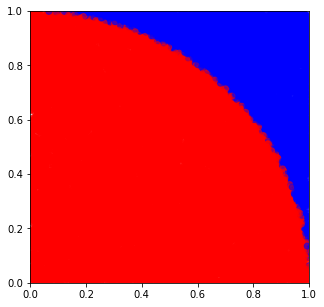

In [9]:
plt.scatter(df['x'], df['y'], c=[within and 'red' or 'blue' for within in df['within_unit_circle']], alpha=0.5)

fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)

ax = plt.gca()
ax.axis([0.0, 1.0, 0.0, 1.0])